# DBSCAN

This is an implementation of **Density-based spatial clustering of applications with noise** method from scratch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def distance(a,b):
    """
    Distance metric to calculate between points and cluster centers.
    """
    return np.mean(np.abs(a - b),axis=1)

def get_neighbors(point,space,eps):
    """
    Get nearest neighbors according to eps.
    """
    return np.where([distance(point,space) < eps])[1]

In [3]:
# hyperparameters
eps = 2
min_points = 10

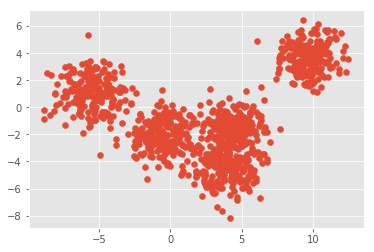

In [4]:
# generate a dataset
X, Y = make_blobs(n_samples=1000, centers=5,cluster_std=1.2,random_state=123,n_features=2)
plt.scatter(X[:, 0], X[:, 1])

# split for training
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [5]:
# used to store current label (cluster counter)
cluster = 0
length = X_train.shape[0]

# used to store all labels
label = np.zeros(length) # 0 unevaluated, -1 unclustered (noise), < 1 clustered (cluster id's)
for i in range(length):
    
    # if evaluated, pass
    if label[i] != 0:
        continue
    
    p = X_train[i]
    
    # neighboring points according to `eps`
    neighbors = get_neighbors(p,X_train,eps)
    neighbors = neighbors[neighbors != i] # eliminate itself
    
    # check if satisfies the amount of number of points to consider as a cluster
    if len(neighbors) < min_points:
        label[i] = -1
        continue
    
    # update the cluster counter
    cluster += 1
    
    # assign cluster number
    label[i] = cluster
    
    # check neighbors' neighbors
    for j in neighbors:
        l = label[j]
        
        if l == -1:
            label[j] = cluster
        
        if l != 0:
            continue
        
        label[j] = cluster
        tmp_neighbors = get_neighbors(p,X_train,eps)
        
        if tmp_neighbors.shape[0] >= min_points:
            neighbors = np.union1d(neighbors,tmp_neighbors)

In [6]:
print(label[:30])

[1. 2. 3. 1. 1. 2. 2. 2. 4. 1. 2. 2. 1. 5. 6. 3. 2. 5. 1. 3. 1. 7. 6. 1.
 5. 5. 3. 1. 3. 6.]


In [7]:
print('Number of clusters: {}'.format(cluster - 1))

Number of clusters: 12


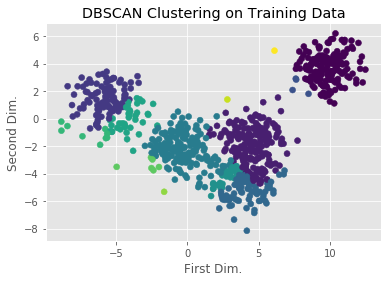

In [8]:
# results on training data
plt.scatter(X_train[:,0],X_train[:,1],c=label)
plt.title('DBSCAN Clustering on Training Data')
plt.xlabel('First Dim.')
plt.ylabel('Second Dim.')
plt.show()